## Problem:

Using the data on which countries medaled in different summer olympic events since the start of the modern olympics, I will attempt to predict who will win the Tokyo 2020 games.
By "win" I mean whhich country will medal in select events, as well as which country will have the most medals. Winning can also be interpreted as the highest weighted score of medals - e.g. 3 for gold, 2 for silver, 1 for bronze.

This data was sourced from kaggle and can be found at this link: https://www.kaggle.com/the-guardian/olympic-games

In [669]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [670]:
df = pd.read_csv("./data/summer.csv")
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


first lets get rid of some unnecessary variables. At first glance, Sport is just a more general version of Discipline, so we will take that out. Athlete is not of much interest either for the sake of this analysis so we will take that out too.

In [671]:
df = df.drop("Sport", axis = 1).drop("Athlete",axis  =1)
df.head()

,Year,City,Discipline,Country,Gender,Event,Medal
0,1896,Athens,Swimming,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Swimming,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Swimming,GRE,Men,100M Freestyle For Sailors,Silver


Let's categorize all of these variables.

In [672]:
for col in df.columns[1:]:
    df[col] = pd.Categorical(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 7 columns):
Year          31165 non-null int64
City          31165 non-null category
Discipline    31165 non-null category
Country       31161 non-null category
Gender        31165 non-null category
Event         31165 non-null category
Medal         31165 non-null category
dtypes: category(6), int64(1)
memory usage: 522.4 KB


Let's make sure this worked correctly by seeing that their are the three medal categories

In [673]:
df.Medal.cat.categories

Index(['Bronze', 'Gold', 'Silver'], dtype='object')

WE also need to remove duplicates, as some events take up multiple observations. for instance, soccer winners get a bunch of the exact same medal (one for each teammate). We only want one observation (medal) for the country, not one for each individual.

In [674]:
df = df.drop_duplicates()

Text(0.5, 1.0, 'Medals given out each year (3 per event)')

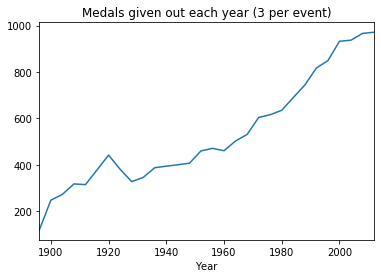

In [675]:
years = df.groupby("Year")
fig = years.count()["Medal"].plot()
fig.set_title("Medals given out each year (3 per event)")

We see that there is much more data for recent years, which is to be expected. I am considering weighting more recent years higher, as they are likely a better representation of a country's current strength in a given event.
An interesting feature of this graph to note the decline in number of medals (and thus, events) during the two world wars.

In [676]:
hosts = df.groupby("Year").first()["City"]
hosts

Year
1896                   Athens
1900                    Paris
1904                 St Louis
1908                   London
1912                Stockholm
1920                  Antwerp
1924                    Paris
1928                Amsterdam
1932              Los Angeles
1936                   Berlin
1948                   London
1952                 Helsinki
1956    Melbourne / Stockholm
1960                     Rome
1964                    Tokyo
1968                   Mexico
1972                   Munich
1976                 Montreal
1980                   Moscow
1984              Los Angeles
1988                    Seoul
1992                Barcelona
1996                  Atlanta
2000                   Sydney
2004                   Athens
2008                  Beijing
2012                   London
Name: City, dtype: category
Categories (22, object): [Amsterdam, Antwerp, Athens, Atlanta, ..., St Louis, Stockholm, Sydney, Tokyo]

Here we see which city hosted each of the olympics. Another thing of note is the lack of summer olympics in 1940 and 44 due to WWII.

Text(0.5, 1.0, 'Times hosted')

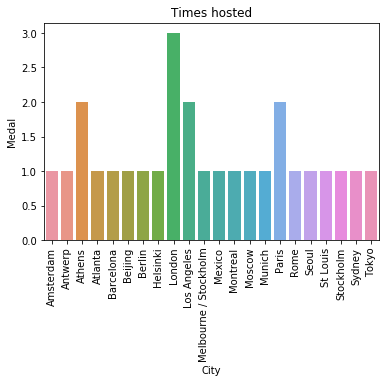

In [677]:
hostCounts = df.groupby("Year").first().groupby("City").count()["Medal"]
ax  = sns.barplot(hostCounts.index, hostCounts)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    
ax.set_title("Times hosted")

Most cities have only hosted the games once, with London being the only city to host 3 times!

In [678]:
print("Medals won:")
df.groupby("Country").count()["Medal"].sort_values(ascending = False).head()

Medals won:


Country
USA    2408
URS    1008
GBR     794
FRA     661
GER     580
Name: Medal, dtype: int64

Here we see the countries with the most medals in summer olympics from 1896 - 2012. On thing to note is that URS is the Soviet Union. We could consider combining the Soviet union and Russia into one category. In the next cell, we see that Russia has medaled 768 time as of the end of the 2012 olympics and after the breakup of the Soviet Union.

Text(0.5, 1.0, 'russia medals won per year by event')

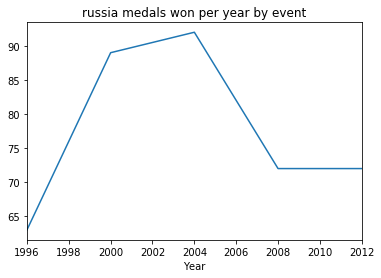

In [679]:
fig = df[df["Country"] == "RUS"].groupby("Year").count()["Medal"].plot()
fig.set_title("russia medals won per year by event")

I have decided not to combine these countries. Because I want to weight more recent olympics heavier, this decision will likely have little effect on the end result.
  
    
Next lets just look at medals won in the 2012 olympics. (the most recent for this data set)

In [680]:
df[df["Year"] == 2012].groupby("Country").count()["Medal"].sort_values(ascending = False).head()

Country
USA    104
CHN     91
RUS     72
GBR     68
GER     45
Name: Medal, dtype: int64

We see the USA is still on top and that USSR's main successor still plays second fiddle. China is prominent, yet does not show up in the top 5 all time. Lets look into this.

Text(0.5, 1.0, 'china medals won per year by event')

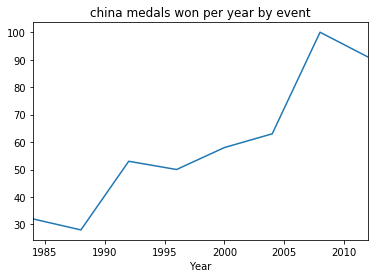

In [681]:
fig = df[df["Country"] == "CHN"].groupby("Year").count()["Medal"].plot()
fig.set_title("china medals won per year by event")

China had no medals before 1984? Seems odd. https://en.wikipedia.org/wiki/China_at_the_Olympics there we have it. China's beef with Taiwan runs deep...

Similar to Russia, due to my thoughts about weighting more recent games much more heavily, this will likely not be a detriment in determining if China will medal.

In [682]:
past5 = df[(df["Year"] == 1996) | (df["Year"] == 2000) |(df["Year"] == 2004) | (df["Year"] == 2008) | (df["Year"] == 2012)]
#now we have only the data from the most recent 5 olympiads that are in this data set ( because this dataset doesn't include 2016)
past5.groupby("Country").count()["Medal"].sort_values(ascending = False).head() / 5

Country
USA    103.6
RUS     77.6
CHN     72.4
GER     51.8
AUS     46.2
Name: Medal, dtype: float64

In the olympiads from '96 to '12, we see that USA had the highest average number of medals per olympiad. What if we look only at golds ?

In [683]:
past5[past5.Medal == "Gold"].groupby("Country").count()["Medal"].sort_values(ascending = False).head() / 5

Country
USA    40.0
CHN    32.8
RUS    25.8
GER    15.4
GBR    14.0
Name: Medal, dtype: float64

China gets a lot of golds! Let's look at some proportions...

In [684]:
past5GoldCount = past5[past5.Medal == "Gold"].groupby("Country").count()["Medal"]
past5MedalCount = past5.groupby("Country").count()["Medal"]
goldProps = past5GoldCount / past5MedalCount
goldProps.sort_values(ascending = False).head()

Country
UAE    1.00
PAN    1.00
BDI    1.00
GRN    1.00
CMR    0.75
Name: Medal, dtype: float64

Looks like UAE, Panama, Grenada, and Berundi got only Golds! Of course, they probably didn't get many medals altogether. Let's only look at countries with atleast 10 medals in the past 5 olympiads.

In [685]:
tenMedalBool = (past5.groupby("Country").count() >= 10)["Year"]
goldProps[tenMedalBool].sort_values(ascending = False).head()

Country
ETH    0.468750
CHN    0.453039
NOR    0.444444
IRI    0.428571
NZL    0.410256
Name: Medal, dtype: float64

Ethiopa takes the gold! So what is Ethiopia so good at winning?

In [686]:
print("Ethopia total medals for events for summer olympics 1996 - 2012, top 5")
df[df["Country"] == "ETH"].groupby("Event").count()["Medal"].sort_values(ascending = False).head()

Ethopia total medals for events for summer olympics 1996 - 2012, top 5


Event
10000M                21
5000M                 13
Marathon               9
3000M Steeple          1
3000M Steeplechase     1
Name: Medal, dtype: int64

Clearly long distance running is Ethiopia's specialty.

We are starting to stray a little from our goal: predicting what country will do best in future olympiads. To figure this out,we could weight the two most important metrics: the medal (gold, silver bronze), and the age of the medal (more recent has more weight).
Given the huge importance of recent dominance in predicting, I am weighting wins by weighting each year 2/3 less than the more recent. So the most recent olympiad has a weight of 1, the next  has weight .66, then .44, .3  etc. for the sake of simplicity with medal weighting, I will do the ["New York Times weighted point system"](https://www.topendsports.com/events/summer/medal-tally/rankings-weighted.htm) which gives weights of 4, 2, and 1 to gold, silver and bronze, respectively. Thus, A bronze from 2012 will have the greater weight than a gold from 2000 but less weight than a gold from 2004. This is a fairly arbitrary weighting system, but I like it.

In [687]:
df["yearWeight"] = (2/3)**(29 - (df["Year"] - 1896)/4) # 2/3 to an exponent = to how many olympiads ago that olympiad was. so 2012's exponent is 0, 2008's is 1, etc.

In [688]:
df["medalWeight"] = 0
def weightMedal (row):
    if row['Medal'] == "Gold" :
        return 4
    if row["Medal"] == "Silver":
        return 2
    if row['Medal'] == "Bronze" :
        return 1
df['medalWeight'] = df.apply(lambda row: weightMedal(row), axis=1)
df["Weight"] = df['medalWeight'] * df["yearWeight"]

In [689]:
df.groupby(["Country","Discipline"]).sum()["Weight"].sort_values(ascending = False).head()

Country  Discipline
USA      Swimming      233.421655
         Athletics     181.544251
RUS      Athletics      88.975309
AUS      Swimming       88.884538
CHN      Diving         81.442615
Name: Weight, dtype: float64

This is a rough way of determining which country will perform the best in a certain discipline in the next olympics. 

We will now use some of this data to predict who will who will win the gold in that event. We will base it only off of the "weight", a score based off of how how well a country did in each event. Using all events is a lot, so we will just do swimming and track &field. for the sake of simplicity we will only use mens events.

In [698]:
df = df[df.Year != 1896]
allscores  = df.groupby(["Country","Event"]).sum()["Weight"]

In [699]:
countries = df["Country"].drop_duplicates().dropna()
events = df[(df["Discipline"] == "Swimming") |(df["Discipline"] == "Athletics")].Event.drop_duplicates()

In [700]:
scores = pd.DataFrame(index = events,columns = countries)
for country in countries:
    for event in events:
        scores.loc[event,country] = allscores[country,event]

In [701]:
for event in scores.index:
    if scores.loc[event].count() < 20:
        scores.drop(event,inplace = True)

In [702]:
scores = scores.fillna(0)

We have taken all track and swimming events with 20 or more scores and created a frame with each countries "strength" in that event. Now we will create y, which is the target. This is who is predicted to win gold in the event.

We will have "truth" be the most recent result (from 2012). 

In [703]:
londonGolds = df[(df["Gender"] == "Men") &(df["Medal"] == "Gold") &(df["Year"] == 2012) & ((df["Discipline"] == "Swimming")|(df["Discipline"] == "Athletics"))]

In [704]:
y = londonGolds[['Event','Country']]

In [705]:
scores.index = scores.index.astype(str)
scores.columns = scores.columns.astype(str)
Xy = pd.merge(scores, y, on= "Event")
Xy.set_index("Event",drop = True,inplace = True)

In [706]:
Xy

,HUN,GBR,AUT,NED,GER,AUS,FRA,DEN,BEL,USA,...,BRN,GUA,GRN,TTO,BOT,MNE,CYP,SGP,GAB,Country
Event,,,,,,,,,,,,,,,,,,,,,
200M Freestyle,0.000023,0.000000,0.000012,2.158614,0.987672,5.258928,6.444444,0.000000,0.000000,9.366440,...,0.0,0,0.0,0.0,0.0,0,0,0,0,FRA
100M,0.000000,0.880174,0.000000,0.006541,0.000952,0.068188,0.000000,0.000000,0.000000,11.594415,...,0.0,0,0.0,0.0,0.0,0,0,0,0,JAM
1500M,0.005138,2.501173,0.197531,0.001522,0.002284,0.023978,0.677368,0.000000,0.052025,2.029040,...,1.0,0,0.0,0.0,0.0,0,0,0,0,ALG
200M,0.000000,0.679476,0.000000,0.011108,0.000200,0.126469,0.795262,0.000000,0.000000,16.283101,...,0.0,0,0.0,0.0,0.0,0,0,0,0,JAM
400M,0.000000,5.456943,0.000000,0.000000,0.000280,1.696821,1.363117,0.000012,0.000000,18.415580,...,0.0,0,4.0,1.0,0.0,0,0,0,0,GRN
400M Hurdles,0.000000,1.455511,0.000000,0.000000,0.000000,0.351166,0.444468,0.000000,0.000000,14.896107,...,0.0,0,0.0,0.0,0.0,0,0,0,0,DOM
800M,0.000000,2.465863,0.592593,0.538310,1.188498,0.056521,0.016937,1.037037,0.062301,0.579829,...,0.0,0,0.0,0.0,2.0,0,0,0,0,KEN
Discus Throw,0.900497,0.000000,0.000000,0.234111,6.438469,0.131687,0.007913,0.000000,0.000000,3.290614,...,0.0,0,0.0,0.0,0.0,0,0,0,0,GER
Hammer Throw,4.891128,0.000134,0.000000,0.000000,2.303570,0.000000,0.000000,0.000000,0.000000,0.412597,...,0.0,0,0.0,0.0,0.0,0,0,0,0,HUN
